In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# spiral dataset
classes = 3
n_points = 100
noise = 0.1

X = np.zeros((n_points*classes, 2))
y = np.zeros(n_points*classes).astype('int')

for class_number in range(classes):
    ix = range(n_points*class_number, n_points*(class_number+1))
    r = np.linspace(0,1, n_points)
    t = np.linspace(class_number*4, (class_number+1)*4, n_points) + np.random.randn(n_points)*noise
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = class_number

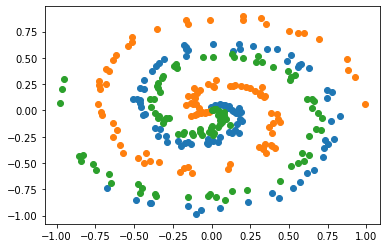

In [108]:
for i in range(classes):
    plt.plot(X[y==i,0],X[y==i,1],'o')

In [3]:
class layer_dense:
    'Neural network dense layer'
    
    # initialization (weights and biases)
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))

    # output
    def forward(self, inputs):
        self.output = inputs.dot(self.weights) + self.biases
        
class activation_ReLU:
    'rectified linear unit activation function'
    
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class activation_softmax:
    'softmax activation function'
    
    def forward(self, inputs):
        exp_values = np.exp(inputs-np.max(inputs,axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# common loss class
class loss:
    def calculate(self, output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
# cross-entropy loss        
class loss_crossentropy(loss):
    
    def forward(self, y_pred, y_true):
        
        # number of data points
        samples = len(y_pred)
        
        # clip data to prevent division by 0
        y_pred_clipped = np.clip(y_pred, 1e-7,1 - 1e-7)
        
        # probabilities for target values (only if categorical labels)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        elif len(y_true.shape)==2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        # losses 
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    


In [13]:
X = np.random.randn(5,2)

In [14]:
y = np.array([0,1,1,1,0])

In [15]:
layer1 = layer_dense(n_inputs = 2, n_neurons = 3)
layer2 = layer_dense(n_inputs = 3, n_neurons = 3)
activation1 = activation_ReLU()
activation2 = activation_softmax()
loss_function = loss_crossentropy()

In [16]:
layer1.forward(X)
activation1.forward(layer1.output)

In [17]:
layer2.forward(activation1.output)
activation2.forward(layer2.output)

In [18]:
activation2.output[:5]

array([[0.33433438, 0.33345022, 0.3322154 ],
       [0.33443721, 0.3303194 , 0.33524339],
       [0.33392891, 0.33170529, 0.33436579],
       [0.33351892, 0.33247271, 0.33400837],
       [0.33333333, 0.33333333, 0.33333333]])

1.1013254058473938